In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

In [ ]:
def print_model_results(name, model, X_test, y_test, feature_names):
    print(f"\n{name} Results:")
    print(f"Accuracy: {model.score(X_test, y_test):.4f}")

    # Print top 5 important features
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    print("\nTop 5 Important Features:")
    print(importances.sort_values('importance', ascending=False).head())

def plot_feature_importance(model, feature_names, title):
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    importances = importances.sort_values('importance', ascending=False)

    plt.figure(figsize=(10,6))
    plt.bar(importances['feature'][:5], importances['importance'][:5])
    plt.xticks(rotation=45)
    plt.title(f'Top 5 Important Features - {title}')
    plt.tight_layout()
    plt.show()

In [ ]:
wine_df = pd.read_csv('winequality-red.csv')
X_wine = wine_df.drop('quality', axis=1)
y_wine = wine_df['quality']

# Split wine data
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42)

# Create ensemble models for wine
rf_wine = RandomForestClassifier(n_estimators=100, random_state=42)
ada_wine = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_wine = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train wine models
rf_wine.fit(X_wine_train, y_wine_train)
ada_wine.fit(X_wine_train, y_wine_train)
gb_wine.fit(X_wine_train, y_wine_train)

print("\n=== WINE QUALITY RESULTS ===")
print_model_results("Random Forest", rf_wine, X_wine_test, y_wine_test, X_wine.columns)
print_model_results("AdaBoost", ada_wine, X_wine_test, y_wine_test, X_wine.columns)
print_model_results("Gradient Boosting", gb_wine, X_wine_test, y_wine_test, X_wine.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== WINE QUALITY RESULTS ===

Random Forest Results:
Accuracy: 0.6594

Top 5 Important Features:
                 feature  importance
10               alcohol    0.148987
9              sulphates    0.115690
6   total sulfur dioxide    0.102300
1       volatile acidity    0.096902
7                density    0.094191

AdaBoost Results:
Accuracy: 0.5281

Top 5 Important Features:
             feature  importance
4          chlorides        0.49
9          sulphates        0.49
1   volatile acidity        0.01
10           alcohol        0.01
0      fixed acidity        0.00

Gradient Boosting Results:
Accuracy: 0.6500

Top 5 Important Features:
                 feature  importance
10               alcohol    0.282608
6   total sulfur dioxide    0.129458
9              sulphates    0.124364
1       volatile acidity    0.083928
4              chlorides    0.070949


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target

# Split cancer data
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42)

# Create ensemble models for cancer
rf_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
ada_cancer = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_cancer = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train cancer models
rf_cancer.fit(X_cancer_train, y_cancer_train)
ada_cancer.fit(X_cancer_train, y_cancer_train)
gb_cancer.fit(X_cancer_train, y_cancer_train)

print("\n=== BREAST CANCER RESULTS ===")
print_model_results("Random Forest", rf_cancer, X_cancer_test, y_cancer_test, cancer.feature_names)
print_model_results("AdaBoost", ada_cancer, X_cancer_test, y_cancer_test, cancer.feature_names)
print_model_results("Gradient Boosting", gb_cancer, X_cancer_test, y_cancer_test, cancer.feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== BREAST CANCER RESULTS ===

Random Forest Results:
Accuracy: 0.9649

Top 5 Important Features:
                 feature  importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001

AdaBoost Results:
Accuracy: 0.9737

Top 5 Important Features:
              feature  importance
28     worst symmetry        0.09
15  compactness error        0.07
1        mean texture        0.07
21      worst texture        0.07
23         worst area        0.07

Gradient Boosting Results:
Accuracy: 0.9561

Top 5 Important Features:
                 feature  importance
7    mean concave points    0.450528
27  worst concave points    0.240103
20          worst radius    0.075589
22       worst perimeter    0.051408
21         worst texture    0.039886


<ipython-input-5-c91def8456ba>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-5-c91def8456ba>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t


=== LOAN PREDICTION RESULTS ===

Random Forest Results:
Accuracy: 0.7724

Top 5 Important Features:
             feature  importance
9     Credit_History    0.257214
5    ApplicantIncome    0.196602
7         LoanAmount    0.196558
6  CoapplicantIncome    0.112315
8   Loan_Amount_Term    0.054512

AdaBoost Results:
Accuracy: 0.7480

Top 5 Important Features:
             feature  importance
5    ApplicantIncome        0.49
7         LoanAmount        0.29
6  CoapplicantIncome        0.08
8   Loan_Amount_Term        0.05
9     Credit_History        0.03

Gradient Boosting Results:
Accuracy: 0.7561

Top 5 Important Features:
             feature  importance
9     Credit_History    0.458260
7         LoanAmount    0.169517
5    ApplicantIncome    0.155673
6  CoapplicantIncome    0.084770
8   Loan_Amount_Term    0.047440


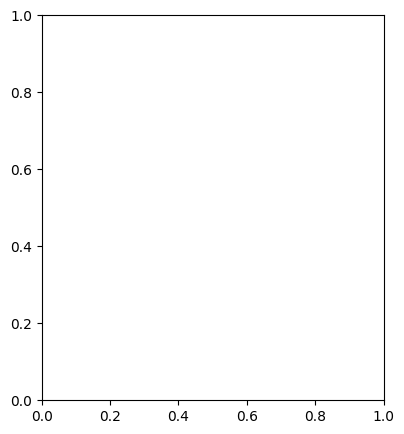

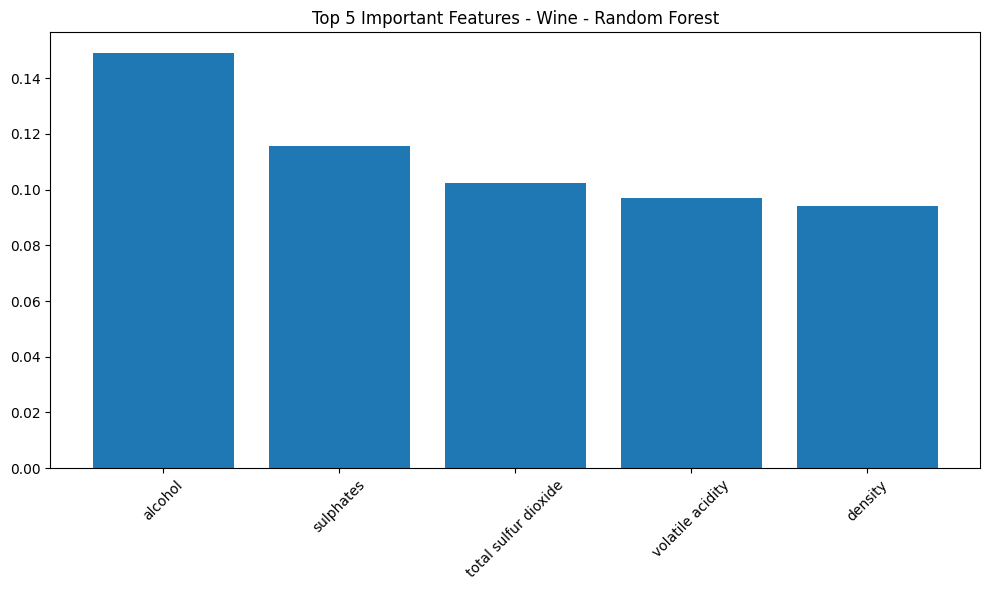

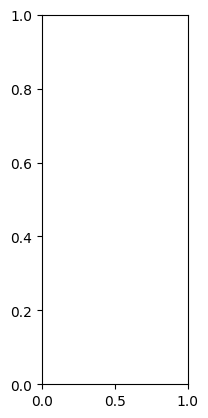

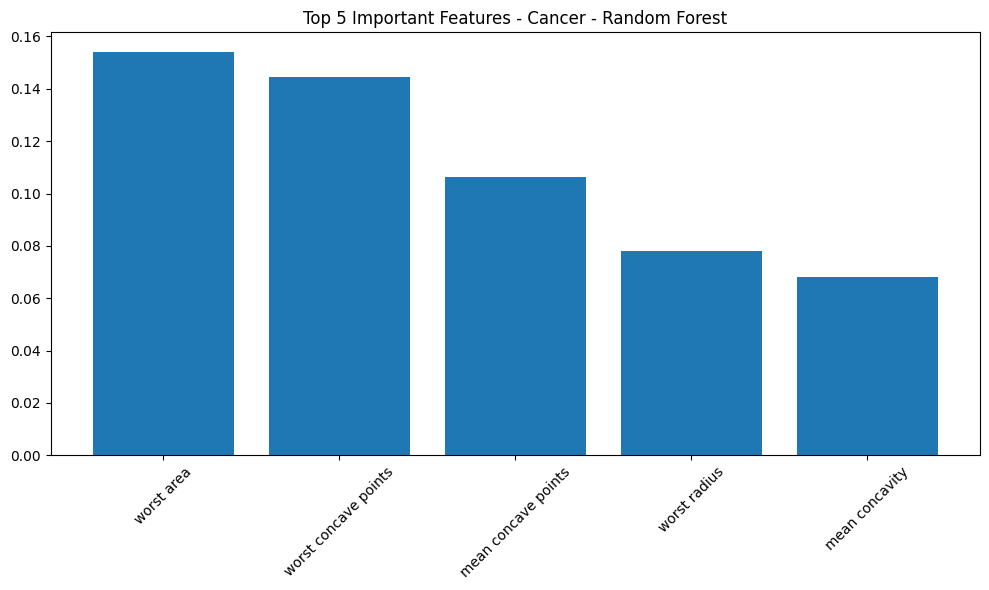

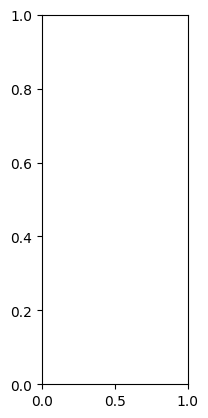

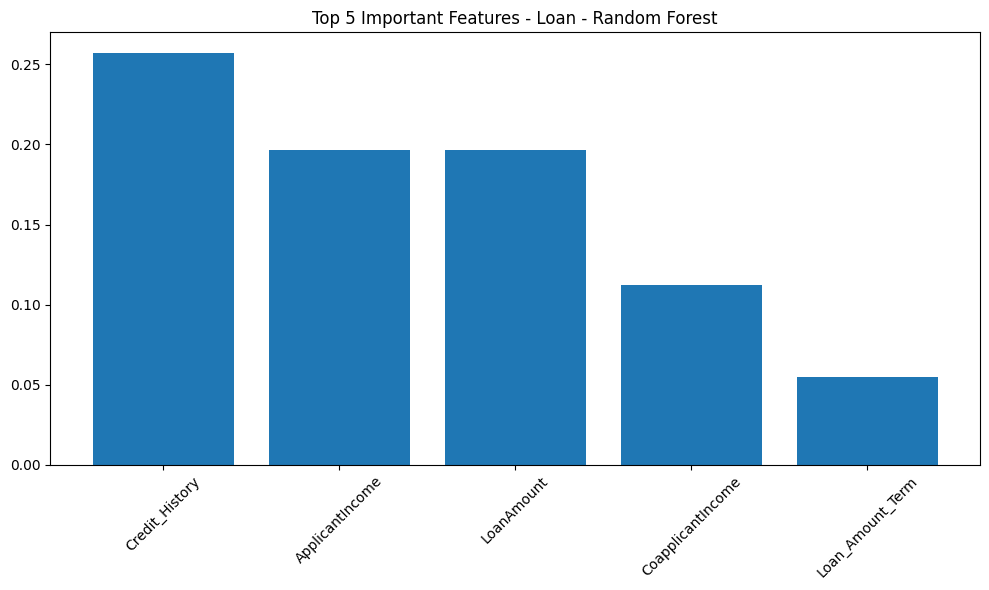


Example Predictions:

Wine Quality:
{'Random Forest': 5, 'AdaBoost': 5, 'Gradient Boosting': 5}

Breast Cancer:
{'Random Forest': 'Benign', 'AdaBoost': 'Benign', 'Gradient Boosting': 'Benign'}

Loan Approval:
{'Random Forest': 'Approved', 'AdaBoost': 'Approved', 'Gradient Boosting': 'Approved'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X doe

In [ ]:
def preprocess_loan_data(df):
    df = df.copy()
    # Fill missing values
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

    # Convert categorical to numerical
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Dependents'] = df['Dependents'].replace('3+', 3)
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
    df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

    return df

# Load loan data
loan_train = pd.read_csv('loan_sanction_train.csv')
loan_test = pd.read_csv('loan_sanction_test.csv')

# Preprocess loan data
loan_train = preprocess_loan_data(loan_train)
loan_test = preprocess_loan_data(loan_test)

# Prepare features
loan_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']

X_loan = loan_train[loan_features]
y_loan = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Split loan data
X_loan_train, X_loan_test, y_loan_train, y_loan_test = train_test_split(
    X_loan, y_loan, test_size=0.2, random_state=42)

# Create ensemble models for loan
rf_loan = RandomForestClassifier(n_estimators=100, random_state=42)
ada_loan = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_loan = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train loan models
rf_loan.fit(X_loan_train, y_loan_train)
ada_loan.fit(X_loan_train, y_loan_train)
gb_loan.fit(X_loan_train, y_loan_train)

print("\n=== LOAN PREDICTION RESULTS ===")
print_model_results("Random Forest", rf_loan, X_loan_test, y_loan_test, loan_features)
print_model_results("AdaBoost", ada_loan, X_loan_test, y_loan_test, loan_features)
print_model_results("Gradient Boosting", gb_loan, X_loan_test, y_loan_test, loan_features)

# Plot feature importance for all models and datasets
plt.figure(figsize=(15, 5))
plt.subplot(131)
plot_feature_importance(rf_wine, X_wine.columns, 'Wine - Random Forest')
plt.subplot(132)
plot_feature_importance(rf_cancer, cancer.feature_names, 'Cancer - Random Forest')
plt.subplot(133)
plot_feature_importance(rf_loan, loan_features, 'Loan - Random Forest')

# Prediction functions
def predict_wine(features):
    return {
        'Random Forest': rf_wine.predict([features])[0],
        'AdaBoost': ada_wine.predict([features])[0],
        'Gradient Boosting': gb_wine.predict([features])[0]
    }

def predict_cancer(features):
    predictions = {
        'Random Forest': rf_cancer.predict([features])[0],
        'AdaBoost': ada_cancer.predict([features])[0],
        'Gradient Boosting': gb_cancer.predict([features])[0]
    }
    return {k: 'Benign' if v == 1 else 'Malignant' for k, v in predictions.items()}

def predict_loan(features):
    predictions = {
        'Random Forest': rf_loan.predict([features])[0],
        'AdaBoost': ada_loan.predict([features])[0],
        'Gradient Boosting': gb_loan.predict([features])[0]
    }
    return {k: 'Approved' if v == 1 else 'Not Approved' for k, v in predictions.items()}

# Example predictions
print("\nExample Predictions:")
print("\nWine Quality:")
print(predict_wine(X_wine_test.iloc[0]))
print("\nBreast Cancer:")
print(predict_cancer(X_cancer_test.iloc[0]))
print("\nLoan Approval:")
print(predict_loan(X_loan_test.iloc[0]))